# Redes Neurais Para Finanças


# Obtendo o dataset

In [1]:
#Construindo o dataset
import pandas as pd
import yfinance as yf
import os

folder = 'datasets'    #criando a pasta datasets
if not os.path.exists(folder):
    os.makedirs(folder)
    
name = "NVDA" 
file = os.path.join(folder, f'{name}.csv') 
data = yf.download(name, start='2004-01-01', end='2024-06-29')
data.to_csv(file)
df = pd.read_csv(file)  #lendo o arquivo csv
df                 #mostrando o dataset

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,0.196417,0.199083,0.192333,0.192333,0.176413,436416000
1,2004-01-05,0.195250,0.199917,0.193500,0.198583,0.182146,575292000
2,2004-01-06,0.198000,0.209417,0.197083,0.206667,0.189561,1093344000
3,2004-01-07,0.204333,0.209500,0.202917,0.208500,0.191242,673032000
4,2004-01-08,0.211083,0.212083,0.207250,0.209250,0.191930,433752000
...,...,...,...,...,...,...,...
5152,2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,476060900
5153,2024-06-25,121.199997,126.500000,119.320000,126.089996,126.089996,425787500
5154,2024-06-26,126.129997,128.119995,122.599998,126.400002,126.400002,362975900
5155,2024-06-27,124.099998,126.410004,122.919998,123.989998,123.989998,252571700


# Análise Exploratória

In [2]:
#visualzando o dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5157 non-null   object 
 1   Open       5157 non-null   float64
 2   High       5157 non-null   float64
 3   Low        5157 non-null   float64
 4   Close      5157 non-null   float64
 5   Adj Close  5157 non-null   float64
 6   Volume     5157 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 282.2+ KB


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000,5.157000e+03
mean,7.179686,7.310312,7.042049,7.184057,7.155181,5.570135e+08
std,16.082464,16.375996,15.757893,16.088933,16.092764,3.332556e+08
min,0.080583,0.083917,0.077500,0.078583,0.072078,4.564400e+07
25%,0.347500,0.353333,0.340500,0.347000,0.319424,3.501680e+08
50%,0.555250,0.564000,0.547750,0.555000,0.522188,4.892400e+08
75%,5.782000,5.903000,5.692500,5.808000,5.753775,6.757640e+08
max,139.800003,140.759995,130.690002,135.580002,135.580002,5.088948e+09


In [4]:
df[df['Open'] <= 0.080583]

,Date,Open,High,Low,Close,Adj Close,Volume
150,2004-08-09,0.080583,0.083917,0.07925,0.082083,0.075289,1579212000


In [5]:
# correlação 
df_corr = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df_corr.corr()
              

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999883,0.999813,0.999612,0.999612,-0.103895
High,0.999883,1.000000,0.999826,0.999800,0.999799,-0.102559
Low,0.999813,0.999826,1.000000,0.999870,0.999870,-0.105680
Close,0.999612,0.999800,0.999870,1.000000,1.000000,-0.104272
Adj Close,0.999612,0.999799,0.999870,1.000000,1.000000,-0.104342
Volume,-0.103895,-0.102559,-0.105680,-0.104272,-0.104342,1.000000


In [6]:
import plotly.express as px
fig = px.imshow(df_corr.corr())
fig.show()


In [7]:
corr_matrix = pd.DataFrame(df_corr.corr())

fig = px.imshow(corr_matrix, x=corr_matrix.columns, y=corr_matrix.columns, zmin = 1, zmax= 1, text_auto=True)
fig.update_layout(title='Correlação entre as variáveis', yaxis_title=" ", xaxis_title=" ")
fig.show()

In [9]:
fig = px.line(df, x='Date', y='Close', title='NVDA - Preço de Fechamento')
fig.show()

# Preparando os Dados

In [10]:
# preparando os dataset
px.box(df, y = 'Close', title = 'NVDA - Preço de Fechamento')

In [11]:
Q1 = df['Close'].quantile(0.25) #primeiro quartil
Q3 = df['Close'].quantile(0.75) #terceiro quartil
IQResult = Q3 - Q1  #Intervalo interquartil
outliers = df[(df['Close'] < (Q1 - 1.5 * IQResult)) | (df['Close'] > (Q3 + 1.5 * IQResult))]
outliers

,Date,Open,High,Low,Close,Adj Close,Volume
4196,2020-09-02,14.703750,14.726750,13.900000,14.346500,14.308165,874012000
4223,2020-10-12,13.989500,14.347000,13.912500,14.226000,14.187986,434744000
4224,2020-10-13,14.296500,14.348500,14.018750,14.248250,14.210176,344604000
4225,2020-10-14,14.290500,14.342750,13.960000,14.095250,14.057587,276100000
4241,2020-11-05,14.162500,14.339000,13.991000,14.160000,14.122165,319028000
...,...,...,...,...,...,...,...
5152,2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,476060900
5153,2024-06-25,121.199997,126.500000,119.320000,126.089996,126.089996,425787500
5154,2024-06-26,126.129997,128.119995,122.599998,126.400002,126.400002,362975900
5155,2024-06-27,124.099998,126.410004,122.919998,123.989998,123.989998,252571700


In [12]:
media_close = df['Close'].median()

for outlier in outliers:
  df['Close'].replace(outlier, media_close, inplace=True)

df    

C:\Users\letic\AppData\Local\Temp\ipykernel_6976\397526359.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,0.196417,0.199083,0.192333,0.192333,0.176413,436416000
1,2004-01-05,0.195250,0.199917,0.193500,0.198583,0.182146,575292000
2,2004-01-06,0.198000,0.209417,0.197083,0.206667,0.189561,1093344000
3,2004-01-07,0.204333,0.209500,0.202917,0.208500,0.191242,673032000
4,2004-01-08,0.211083,0.212083,0.207250,0.209250,0.191930,433752000
...,...,...,...,...,...,...,...
5152,2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,476060900
5153,2024-06-25,121.199997,126.500000,119.320000,126.089996,126.089996,425787500
5154,2024-06-26,126.129997,128.119995,122.599998,126.400002,126.400002,362975900
5155,2024-06-27,124.099998,126.410004,122.919998,123.989998,123.989998,252571700


In [13]:
px.box(df, y = 'Close', title = 'NVDA - Preço de Fechamento')

# Preparando os Dados

In [14]:
df['Date'].unique().max()

'2024-06-28'

In [15]:
#Transformando em um Dtype(datetime)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].unique().max()

   

Timestamp('2024-06-28 00:00:00')

In [16]:
#total de dias
total_rows = len(df)
legs = 21

df_train = df.iloc[:total_rows - legs]
df_test = df.iloc[total_rows - legs:] #até o final 

print(f'Treino: {len(df_train)}')
print(f'Teste: {len(df_test)}')

Treino: 5136
Teste: 21


In [17]:
#Conjunto de treino
training_set = df_train[['Close']].values
training_set

array([[  0.192333  ],
       [  0.19858301],
       [  0.20666701],
       ...,
       [106.46900177],
       [113.90100098],
       [114.82499695]])

In [18]:
#processo de normalização de dados
#processo de escalamento de dados

from sklearn.preprocessing import MinMaxScaler #normalização de dados
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set.reshape(-1,1)) #transformando em um array
training_set_scaled

array([[9.91316346e-04],
       [1.04578436e-03],
       [1.11623535e-03],
       ...,
       [9.27178594e-01],
       [9.91947496e-01],
       [1.00000000e+00]])

In [19]:
intervalo_entre_os_dias = 60

In [20]:
X_train = []
Y_train = []

for i in range(intervalo_entre_os_dias, len(training_set)):
    X_train.append(training_set[i-intervalo_entre_os_dias:i, 0]) #vai pegar os 60 dias anteriores
    Y_train.append(training_set[i, 0]) #todos os valores do intervalo
    
import numpy as np

X_train, Y_train = np.array(X_train), np.array(Y_train)    
    



In [21]:
X_train.shape

(5076, 60)

#  Treino


In [22]:
# Treinando a rede neural
batch_size = len(X_train) #numero de amostras que serão propagadas pela rede
time_step = intervalo_entre_os_dias 
features = 1

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], features))




In [23]:
X_train.shape

(5076, 60, 1)

In [30]:
Y_train.shape

(5076,)

In [24]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

rnn = Sequential()



In [26]:
#criar camadas
rnn.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, features)))
rnn.add(Dropout(0.5))

rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.5))

rnn.add(LSTM(units = 50, return_sequences = True))
rnn.add(Dropout(0.5))

rnn.add(LSTM(units = 50))
rnn.add(Dropout(0.5))

rnn.add(Dense(units = 1))

C:\Users\letic\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



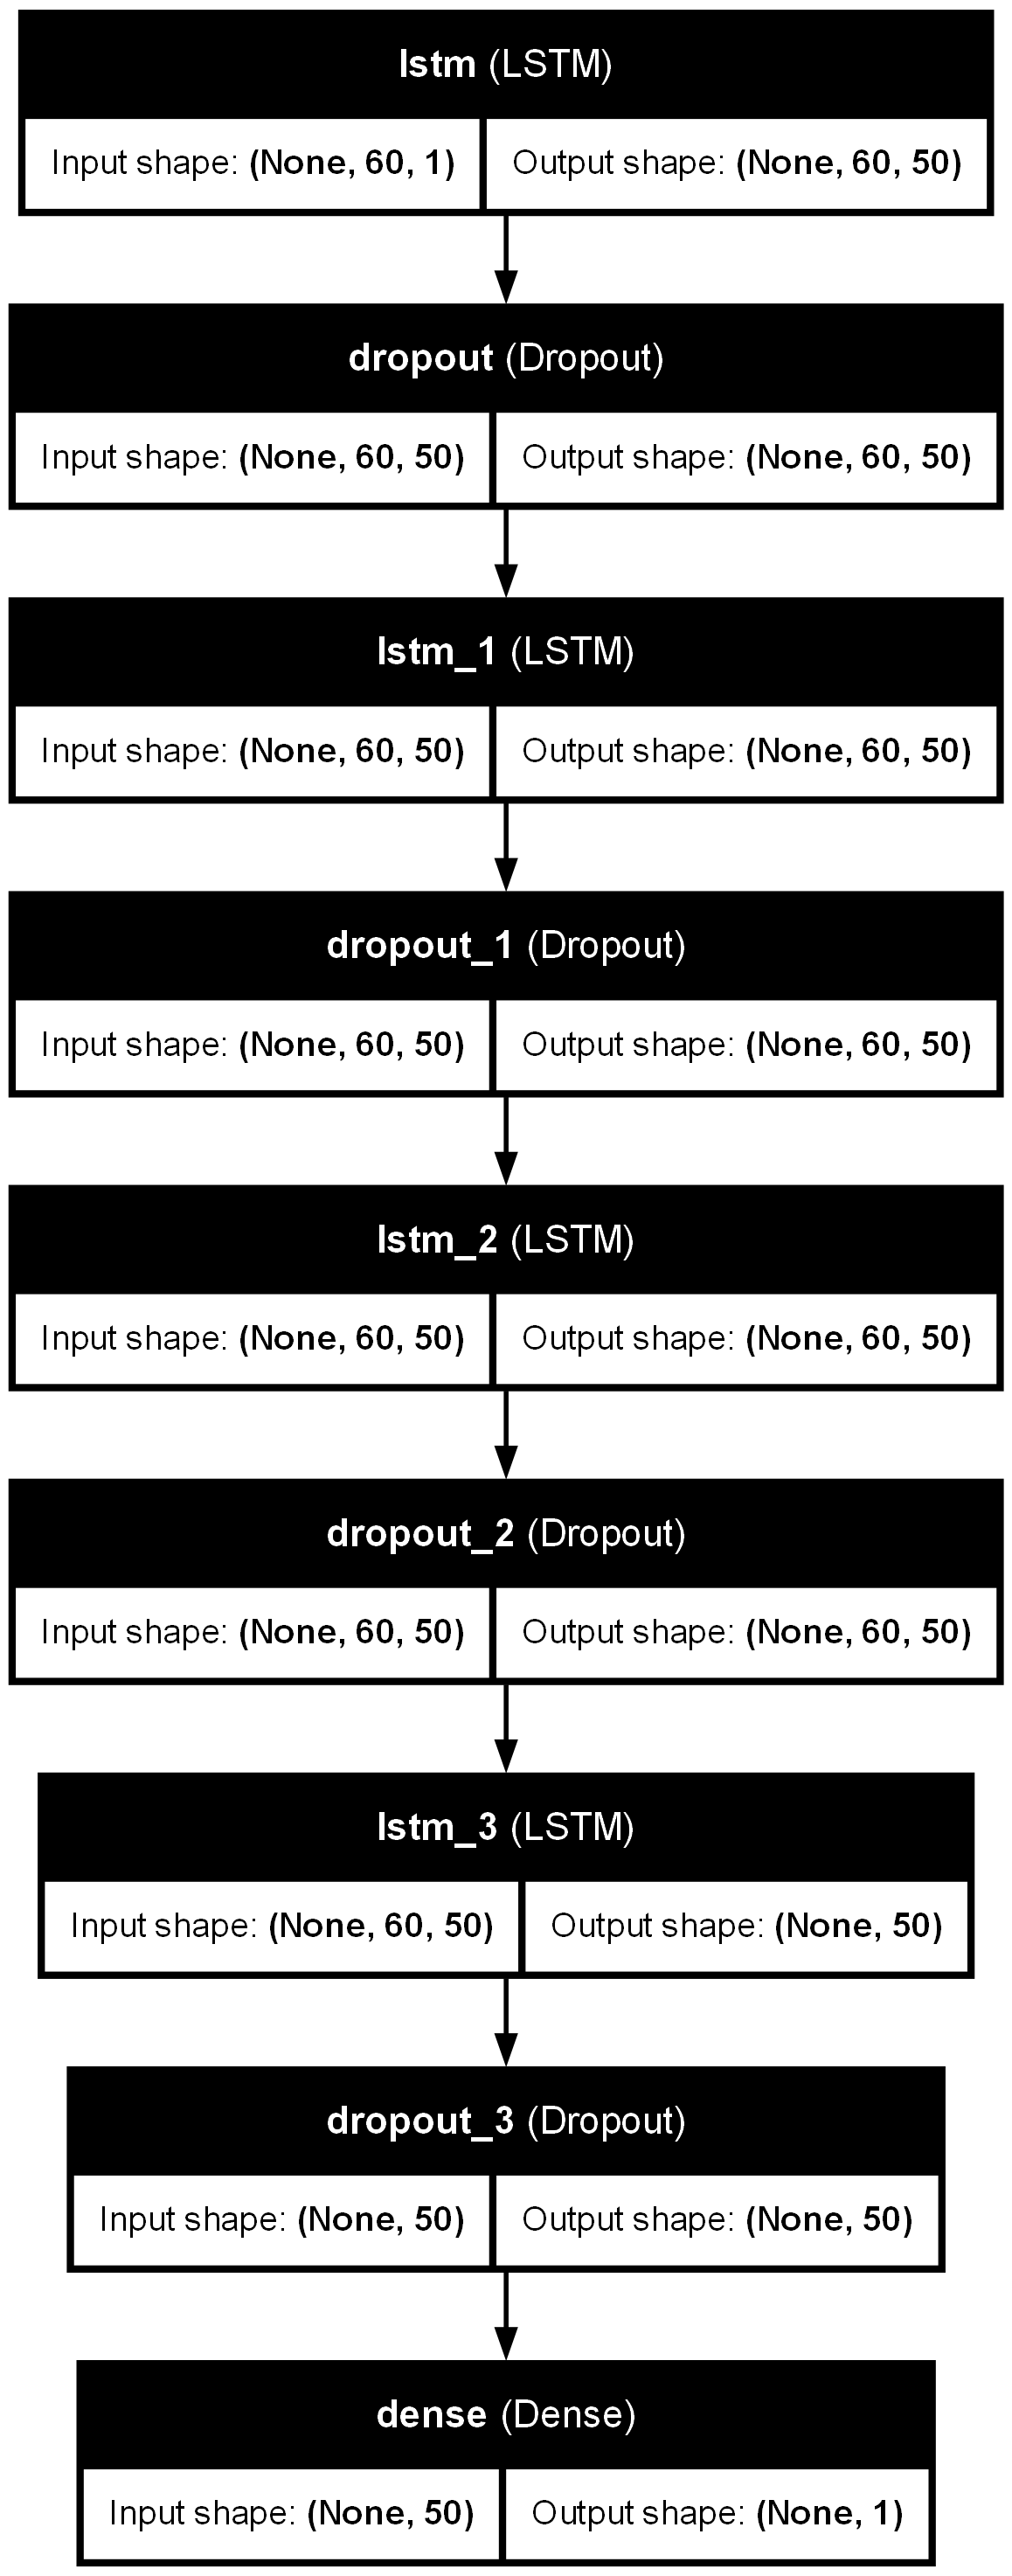

In [27]:
#vizualiar as redes neurais
import pydot 

from tensorflow.keras.utils import plot_model

plot_model(rnn, to_file='redes_graficas.png', show_shapes=True,  show_layer_names=True, expand_nested=True)


In [41]:
#compilando
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
rnn.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.0000e+00 - loss: 18.4755
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.0000e+00 - loss: 15.1313
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.0000e+00 - loss: 11.7573
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.0000e+00 - loss: 9.5184
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.0000e+00 - loss: 9.5464
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.0000e+00 - loss: 12.3384
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.0000e+00 - loss: 10.5976
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.0000e+00 - loss: 8.7159
Epoch 9/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.0000e+00 - loss: 8.3470
Epoch 10/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.0000e+00 - loss: 8.2839
Epoch 11/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.

# Teste

In [42]:
# Testando 

fechamento_real = df_test['Close'].values

dataset_total = pd.concat((df['Close'], df_test['Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(df_test) - intervalo_entre_os_dias:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

inputs = sc.transform(inputs)


In [43]:
X_test = []
for i in range(intervalo_entre_os_dias, len(inputs)):
    X_test.append(inputs[i-intervalo_entre_os_dias:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [44]:
print(f'Previsao oficial:{rnn.predict(X_test)}')
print(f'Valor real:{sc.inverse_transform(rnn.predict(X_test))}')

variacao_final = sc.inverse_transform(rnn.predict(X_test))
print(variacao_final)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
Previsao oficial:[[0.06152344]
 [0.0615015 ]
 [0.06155968]
 [0.06160212]
 [0.061584  ]
 [0.06150579]
 [0.06145048]
 [0.06147671]
 [0.06159306]
 [0.06175995]
 [0.06189299]
 [0.06193972]
 [0.06190586]
 [0.06184721]
 [0.06180334]
 [0.06183147]
 [0.06192064]
 [0.06202555]
 [0.06202126]
 [0.06190157]
 [0.06172943]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Valor real:[[7.1381764]
 [7.1356597]
 [7.142335 ]
 [7.147205 ]
 [7.1451254]
 [7.1361523]
 [7.129805 ]
 [7.1328144]
 [7.146165 ]
 [7.1653156]
 [7.1805816]
 [7.1859436]
 [7.182059 ]
 [7.1753287]
 [7.170295 ]
 [7.173523 ]
 [7.183755 ]
 [7.195792 ]
 [7.1953   ]
 [7.181566 ]
 [7.1618137]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[7.1381764]
 [7.1356597]
 [7.142335 ]
 [7.147205 ]
 [7.1451254]
 [7.1361523]
 [7.129805 ]
 [7.1328144]
 [7.146165 ]
 [7.1653156]
 [7.1805816]
 [7.1859436]
 [7.182059 ]
 [7.1753287]
 [7.170295 ]
 [7.173523 ]
 [7.183755 ]
 [7.195792 ]
 [7.1953   ]
 [7.181566 ]
 [7.1618137]]


# Avaliação de Resultados

In [47]:
# avaliando os resultados

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(len(fechamento_real))), y=fechamento_real, mode='lines', name='Dados reais das ações NVIDIA', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=list(range(len(variacao_final))), y=variacao_final, mode='lines', name='Previsão de fechamento das ações NVIDIA', line=dict(color='red')))

fig.update_layout(title='Previsão de fechamento das ações NVIDIA', xaxis_title='Tempo', yaxis_title='Preço de fechamento', legend_title='Legenda')